<a href="https://colab.research.google.com/github/shreyash321/Outpainting_model-with-Inpainting-technique/blob/main/Copy_of_Shreyash_outpainting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load the model and install the libraries
!pip install git+https://github.com/huggingface/diffusers.git
from diffusers import AutoPipelineForInpainting
import torch
from PIL import Image
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
pipe = AutoPipelineForInpainting.from_pretrained("diffusers/stable-diffusion-xl-1.0-inpainting-0.1", torch_dtype=torch.float16, variant="fp16").to(device)

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-ayg1xq4w
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-ayg1xq4w
  Resolved https://github.com/huggingface/diffusers.git to commit 4a782f462a063abbe3067d1944933576451bf6a9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.30.0.dev0-py3-none-any.whl size=2443649 sha256=043f24a620f79e210f45b72f7a0ef8caeb6eac4174f42758a7a451fc716aea50
  Stored in directory: /tmp/pip-ephem-wheel-cache-rhr93r6j/wheels/4d/b7/a8/6f9549ceec5daad78675b857ac57d697c387062506520a7b50
Successfully built diffusers


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/659 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


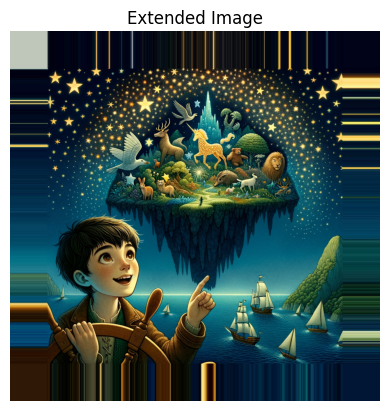

In [ ]:
#preprocess the image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
input_image_path = '/content/assignment.jpg'  # replace with your input image path
input_image = cv2.imread(input_image_path)

# Get the dimensions of the input image
height, width, channels = input_image.shape

# Define the px size you want to increase around your image
border_size = 128

# Create a new image with the extended size
new_height = height + 2 * border_size
new_width = width + 2 * border_size
extended_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)

# Fill the central region with the input image
extended_image[border_size:border_size+height, border_size:border_size+width] = input_image

# Fill the extended regions with border pixels
# Top
extended_image[:border_size, border_size:border_size+width] = input_image[0:1, :, :]
# Bottom
extended_image[border_size+height:, border_size:border_size+width] = input_image[-1:, :, :]
# Left
extended_image[border_size:border_size+height, :border_size] = input_image[:, 0:1, :]
# Right
extended_image[border_size:border_size+height, border_size+width:] = input_image[:, -1:, :]

# Fill the corners
# Top-left
extended_image[:border_size, :border_size] = input_image[0, 0, :]
# Top-right
extended_image[:border_size, border_size+width:] = input_image[0, -1, :]
# Bottom-left
extended_image[border_size+height:, :border_size] = input_image[-1, 0, :]
# Bottom-right
extended_image[border_size+height:, border_size+width:] = input_image[-1, -1, :]

# Save or display the extended image
output_image_path = 'extended_image.jpg'  # replace with your desired output path
cv2.imwrite(output_image_path, extended_image)


# Display the extended image
plt.imshow(cv2.cvtColor(extended_image, cv2.COLOR_BGR2RGB))
plt.title('Extended Image')
plt.axis('off')
plt.show()

In [ ]:
#mask the image
from google.colab.patches import cv2_imshow
image = input_image
height, width = image.shape[:2]
padding = 128 # num pixels to outpaint
mask = np.ones((height+2*padding, width+2*padding), dtype=np.uint8) * 255
mask[padding:-padding, padding:-padding] = 0
#cv2_imshow(mask)
cv2.imwrite("mask.png", mask)

True

  0%|          | 0/19 [00:00<?, ?it/s]

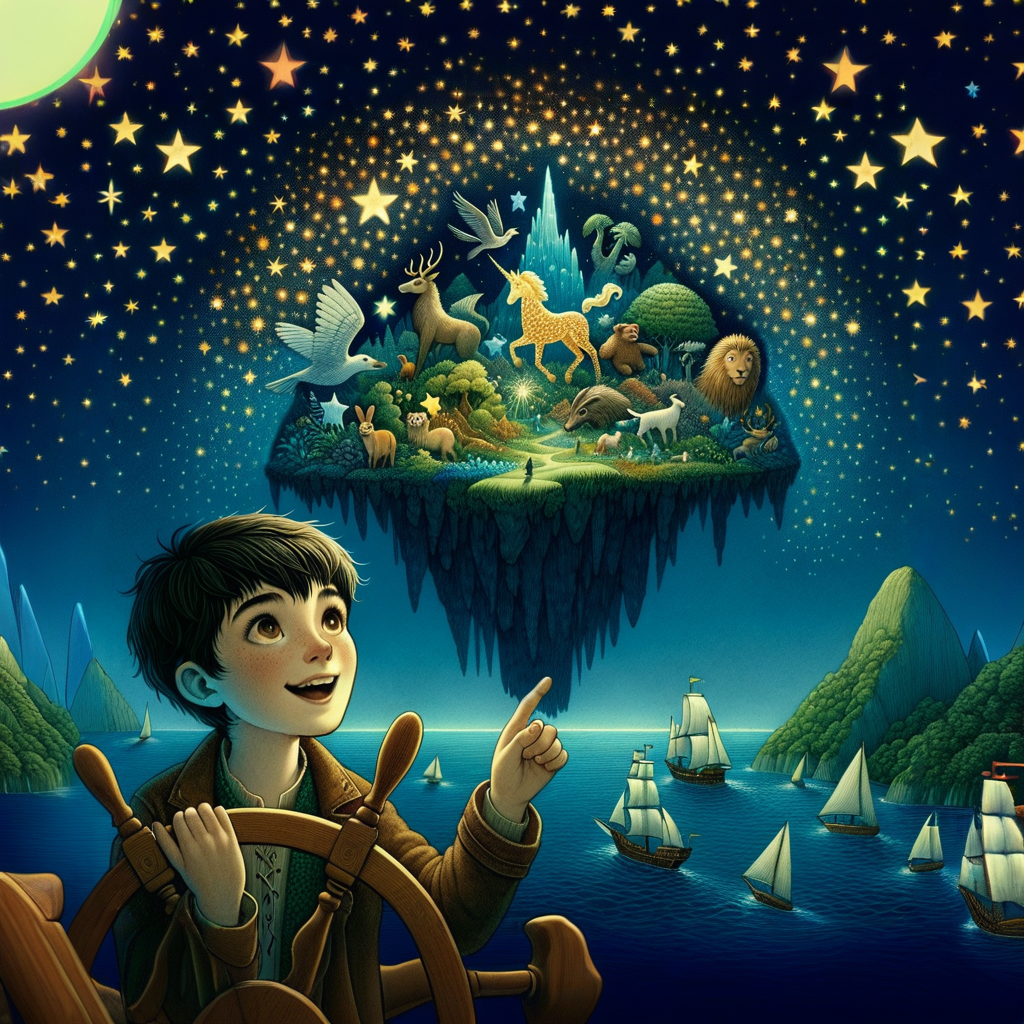

In [ ]:
#generate your outpaint image
init_image = Image.open('/content/extended_image.jpg')
mask_image = Image.open('/content/mask.png')
prompt = "beautiful highly detailed imaginary image,4k"
generator = torch.Generator(device=device).manual_seed(0)

image = pipe(
  prompt=prompt,
  image=init_image,
  mask_image=mask_image,
  guidance_scale=8.0,
  num_inference_steps=20,  # steps between 15 and 30 work well for us
  strength=0.99,  # make sure to use `strength` below 1.0
  generator=generator,
).images[0]
image.save("generated_image.png")
Image.open("generated_image.png")